## MNIST 
#### MNIST 손글씨 이미지를 다음의 방법으로 분류하고 test data를 이용하여 정확도를 비교하여라.
1. Softmax Regression
2. Support Vector Machine
3. Decision tree or Random forest

In [1]:
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import models 
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import time

(X, y), (X_test, y_test) = mnist.load_data()

y_train=to_categorical(y)
y_test_cat=to_categorical(y_test)

Using TensorFlow backend.


In [2]:
len(X_test) , len(X)

(10000, 60000)

In [3]:
np.shape(X)

(60000, 28, 28)

## Softmax Regression

In [4]:
net = models.Sequential()
net.add(layers.Dense(10,activation='softmax',input_shape=(28*28,)))
#net.add: 층을 추가 (출력층 개수, 활성화 함수, 입력 형태)
net.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
# preprocessing
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [44]:
net.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2905 - accuracy: 0.9243
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9290
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2599 - accuracy: 0.9305
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2542 - accuracy: 0.9308
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2502 - accuracy: 0.9325
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2475 - accuracy: 0.9329
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2448 - accuracy: 0.9331
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.9331
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2412 - accuracy: 0.9342
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [9]:
net_err, net_acc= net.evaluate(X_test,y_test_cat)

313/313 [==============================] - 0s 757us/step - loss: 0.2718 - accuracy: 0.9250


In [10]:
print("error: ", net_err, "accuracy: ",net_acc*100,"%")

error:  0.2718333601951599 accuracy:  92.5000011920929 %


In [11]:
Num_dat=20
nn_score=[]
Num=0

start=time.time()

for N in range(Num_dat):
    Num=250*(N+1)
    ran=np.random.choice(60000,Num)
    X_t=X_train[ran]
    y_t=y_train[ran]
    print('Date Number:',Num)
    net.fit(X_t, y_t, epochs=30,verbose=0)
    _,score=net.evaluate(X_test,y_test_cat)
    print('test score:',score*100,'%','\n')
    nn_score.append(score)

print('Spending Time:', (time.time()-start)/60,'[min]')

Date Number: 250
313/313 [==============================] - 0s 651us/step - loss: 0.2900 - accuracy: 0.9215
test score: 92.1500027179718 % 

Date Number: 500
313/313 [==============================] - 0s 699us/step - loss: 0.3144 - accuracy: 0.9152
test score: 91.51999950408936 % 

Date Number: 750
313/313 [==============================] - 0s 739us/step - loss: 0.3194 - accuracy: 0.9137
test score: 91.36999845504761 % 

Date Number: 1000
313/313 [==============================] - 0s 788us/step - loss: 0.3343 - accuracy: 0.9097
test score: 90.96999764442444 % 

Date Number: 1250
313/313 [==============================] - 0s 639us/step - loss: 0.3287 - accuracy: 0.9142
test score: 91.42000079154968 % 

Date Number: 1500
313/313 [==============================] - 0s 746us/step - loss: 0.3394 - accuracy: 0.9132
test score: 91.32000207901001 % 

Date Number: 1750
313/313 [==============================] - 0s 821us/step - loss: 0.3804 - accuracy: 0.9027
test score: 90.27000069618225 % 

Dat

이후 SVM, Decision tree, Random forest에서는 데이터 양이 너무 많고, 알고리즘의 복잡성도 높기 때문에 잘 fitting 되질 않는다.\
따라서 정확한 비교를 위해서 Softmax regression의 Data 양도 줄였다.

## Support Vector Machine

In [12]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer

In [13]:
def best_svc(X_t,y_t,svc_param_list):#,n_iter=10):
    svc = svm.SVC(kernel='linear',gamma='auto')


    #svc_grid= RandomizedSearchCV(estimator=svc, param_distributions = svc_param_list,n_iter=n_iter,cv = 5, n_jobs=-1)
    svc_grid= GridSearchCV(estimator=svc, param_grid = svc_param_list,cv = 5, n_jobs=-1)
    svc_grid.fit(X_t, y_t)

    print("best parameters:",svc_grid.best_params_)
    print('best score:', svc_grid.best_score_)

    svc = svc_grid.best_estimator_
    svc.fit(X_t,y_t)
    
    return svc

In [14]:
svc_param_list = {'kernel':['linear','rbf','poly'],
                  'C': np.linspace(5,10,10),
                  'gamma':['auto'],
                  'random_state': [0]}
svc_score=[]
Num=0

start=time.time()

for N in range(Num_dat):
    Num=250*(N+1)
    ran=np.random.choice(60000,Num)
    X_t=X_train[ran]
    y_t=y[ran]
    print('Date Number:',Num)
    svc=best_svc(X_t,y_t,svc_param_list)
    score=svc.score(X_test,y_test)
    print('test score:',score*100,'%','\n')
    svc_score.append(score)
    
print('Spening Time:', (time.time()-start)/60,'[min]')

Date Number: 250
best parameters: {'C': 5.0, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}
best score: 0.836
test score: 85.16 % 

Date Number: 500
best parameters: {'C': 5.0, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}
best score: 0.8780000000000001
test score: 86.76 % 

Date Number: 750
best parameters: {'C': 9.444444444444445, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
best score: 0.8800000000000001
test score: 90.16999999999999 % 

Date Number: 1000
best parameters: {'C': 8.88888888888889, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
best score: 0.891
test score: 90.79 % 

Date Number: 1250
best parameters: {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
best score: 0.9040000000000001
test score: 91.10000000000001 % 

Date Number: 1500
best parameters: {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
best score: 0.9126666666666667
test score: 91.0 % 

Date Number: 1750
best parameters: {'C': 9.444444444444445,

## Decission Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
def best_tree(X_t,y_t,tree_param_list,):#,n_iter=10):

    tree=DecisionTreeClassifier(random_state=0)

    tree_grid= GridSearchCV(estimator=tree, param_grid = tree_param_list,cv = 5, n_jobs=-1)
    #tree_grid= RandomizedSearchCV(estimator=tree, param_grid = tree_param_list,cv = 5, n_jobs=-1,n_iter=n_iter)
    tree_grid.fit(X_t, y_t)

    print("best parameters:",tree_grid.best_params_)
    print('best score:', tree_grid.best_score_)

    tree = tree_grid.best_estimator_
    tree.fit(X_t,y_t)
    
    return tree

In [23]:
tree_param_list = {'criterion':['gini','entropy'],
                    'max_depth':[2, 4, 6, 8, None], 
                    'max_leaf_nodes':[None,2,3,4,5],
                   'min_samples_split':[1,2,3,4],
                    'min_samples_leaf':[3,5,7,10]}

tree_score=[]
Num=0

start=time.time()


for N in range(Num_dat):
    Num=250*(N+1)
    ran=np.random.choice(60000,Num)
    X_t=X_train[ran]
    y_t=y[ran]
    print('Date Number:',Num)
    tree=best_tree(X_t,y_t,tree_param_list)
    score=tree.score(X_test,y_test)
    print('test score:',score*100,'%','\n')
    tree_score.append(score)
    
print('Spending Time:', (time.time()-start)/60,'[min]')

Date Number: 250
best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.612
test score: 53.7 % 

Date Number: 500
best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.6140000000000001
test score: 62.849999999999994 % 

Date Number: 750
best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.6346666666666666
test score: 67.45 % 

Date Number: 1000
best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.64
test score: 66.84 % 

Date Number: 1250
best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.6928000000000001
test score: 70.25 % 

Date Number: 15

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
def best_rf(X_t,y_t,rf_param_list,):#,n_iter=10):

    rf=RandomForestClassifier(random_state=0)

    rf_grid= GridSearchCV(estimator=rf, param_grid = rf_param_list,cv = 5, n_jobs=-1)
    #rf_grid= RandomizedSearchCV(estimator=rf, param_distributions = rf_param_list2,n_iter=60,cv = 5, n_jobs=-1)
    rf_grid.fit(X_t, y_t)

    print("best parameters:",rf_grid.best_params_)
    print('best score:', rf_grid.best_score_)

    rf = rf_grid.best_estimator_
    rf.fit(X_t,y_t)
    
    return rf

In [37]:
rf_param_list = {"n_estimators": [1000,1500],
                 'criterion': ['gini', 'entropy'],
              "max_depth": [8, 10, None],
              "min_samples_leaf": [3,5]}

rf_score=[]
Num=0

start=time.time()

for N in range(Num_dat):
    Num=250*(N+1)
    ran=np.random.choice(60000,Num)
    X_t=X_train[ran]
    y_t=y[ran]
    print('Date Number:',Num)
    rf=best_rf(X_t,y_t,rf_param_list)
    score=rf.score(X_test,y_test)
    print('test score:',score*100,'%','\n')
    rf_score.append(score)

print('Spending Time:', (time.time()-start)/60,'[min]')

Date Number: 250
best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 1500}
best score: 0.8039999999999999
test score: 80.10000000000001 % 

Date Number: 500
best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 1500}
best score: 0.8879999999999999
test score: 86.33 % 

Date Number: 750
best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 1500}
best score: 0.8826666666666666
test score: 88.92 % 

Date Number: 1000
best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 1000}
best score: 0.8950000000000001
test score: 89.47 % 

Date Number: 1250
best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 1500}
best score: 0.8928
test score: 90.72 % 

Date Number: 1500
best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 1000}
best s

결론적으로 Radom Forest, SVM이 93.88%와 93.42%로 정확도가 Softmax보다 높았다. 그러나 SVM과 Random Forest에 소모되는 시간은 Softmax regression을 하는 데 보다 훨씬 크다. 특히 데이터가 커지면 소모되는 시간이 기하급수적으로 커진다. (그러한 이유로 데이터 5000개까지만을 다루었다.) 게다가 sklearn은 tensorflow와 달리 GPU를 지원하지 않아서, 계산 속도를 향상시킬 방법이 딱히 없어보인다. 그렇기에, 적은 데이터에서 SVM과 Random Forest가 Softmax 보다는 좋은 성능을 주었지만, Cross Validation과 Fitting에 걸리는 시간이 너무 오래 걸리고, 성능도 softmax와 큰 차이가 없었다. 그에 반해 Softmax는 MNIST dataset에서 Data의 개수와 상관없이 평균적으로 좋은 정확도를 가지고 있다.

## 각 Model들에 대한 결론

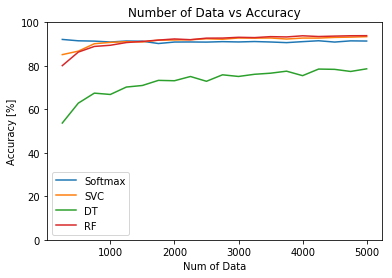

In [43]:
Num_space=np.linspace(250,250*Num_dat,Num_dat)

plt.title("Number of Data vs Accuracy")
plt.ylim(0,100)
plt.xlabel("Num of Data");plt.ylabel("Accuracy [%]")
plt.plot(Num_space,np.array(nn_score)*100,label='Softmax')
plt.plot(Num_space,np.array(svc_score)*100,label='SVC')
plt.plot(Num_space,np.array(tree_score)*100, label='DT')
plt.plot(Num_space,np.array(rf_score)*100, label='RF')
plt.legend()
plt.show()

그래프를 보았을 때, 데이터 양이 많아질 수록 확실히 정확도가 높았지만, 소모되는 시간도 늘어난다. 따라서, 소모되는 시간 적고, 정확도도 어느 정도 나오는 softmax regression를 이용하는 것이 좋아보인다. 또한, MNIST처럼 데이터양이 많은 경우는 더더욱 softmax regression을 이용하는 것이 SVM(SVC),Random forest를 이용하는 것보다 좋다. 한편, Random forest는 정확도를 높이기 위해서 n_estimator라는 parameter를 높게 주는 것이 좋은데, 그럴 경우에 처리 속도가 매우 느려진다는 단점이 있다.

SoftMax Regression: 정확도는 SVM과 RF보다 덜하지만, 꽤 우수한 편. 또한, 처리 속도가 매우 빠름. GPU 사용가능.\
Supprot Vector Machine: 작은 양의 데이터로도 비교적 높은 정확도를 가짐. 단, 처리 속도가 느림. GPU 사용 불가능.\
Decision Tree: Non-Catregorized feature에 대한 정확도가 떨어짐. 처리 속도는 중간 정도. GPU 사용 불가능.\
Random Forest: 작은 양의 데이터로도 비교적 높은 정확도를 가짐. 단, 처리 속도가 상당히 느림. GPU 사용 불가능

|  <center>Models</center>|  <center>Accuracy</center> |  <center>Time Consuming</center> |  <center>GPU Available</center> |<center>Iteration</center> |
|:--------|:--------:|--------:|--------:|--------:|
|**SoftMax** | <center>91.41% </center> |<center>1.034 min </center>|<center> O </center>|<center> 30 </center>|
|**SVM** | <center> 93.42% </center> | <center> 114.9 min </center> |<center> X</center>|<center> 30 </center>|
|**Decision Tree** | <center>78.63%  </center> |<center> 75.30 min </center> |<center>X </center>|<center> 800 </center>|
|**Random Forest** | <center>93.88% </center> |<center> 231.33 min</center> |<center>X </center>|<center> 24 </center>|

 <center>Dataset: 5000 CPU info: i7-8550U, GPU info: X </center>

In [68]:
import pandas as pd

df=pd.DataFrame({'softmax': np.argmax(net.predict(X_test),axis=1),
                'svm':svc.predict(X_test),
                'Tree':tree.predict(X_test),
                'RF':rf.predict(X_test),
                'Answer':y_test})

df

,softmax,svm,Tree,RF,Answer
0,7,7,7,7,7
1,2,2,3,2,2
2,1,1,1,1,1
3,0,0,0,0,0
4,4,4,4,4,4
...,...,...,...,...,...
9995,2,2,2,2,2
9996,3,3,3,3,3
9997,4,4,4,4,4
9998,5,5,9,5,5


# Models Visualization

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.477284 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.477284 to fit



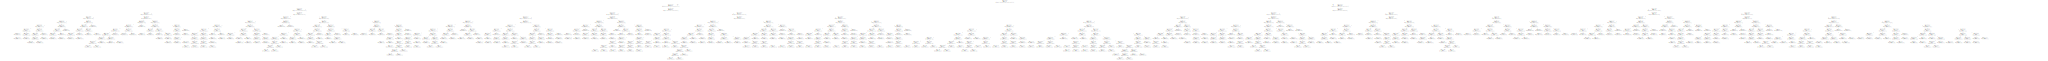

In [113]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

dot_tree=export_graphviz(tree)
tree_graph = pydotplus.graph_from_dot_data(dot_tree)
tree_graph.write_png('original_tree.png')
tree_graph.set_size("'1000,1000!'")
tree_graph.write_png('resized_tree.png')

gvz_tree = graphviz.Source(pydot_graph.to_string())

gvz_tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.488848 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.488848 to fit



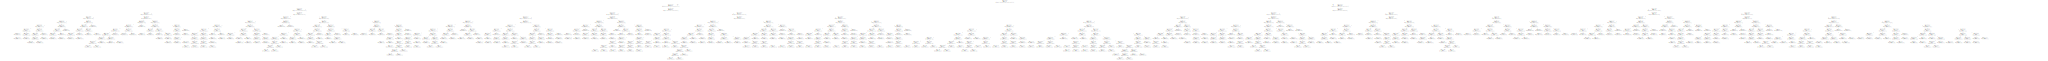

In [114]:
dot_rf=export_graphviz(rf.estimators_[-1])
rf_graph = pydotplus.graph_from_dot_data(dot_rf)
rf_graph.write_png('original_rf.png')
rf_graph.set_size("'1000,1000!'")
rf_graph.write_png('resized_rf.png')

gvz_rf = graphviz.Source(pydot_graph.to_string())

gvz_rf

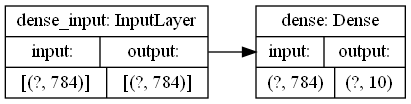

In [136]:
keras.utils.plot_model(net,show_shapes=True, rankdir='LR')

Random Forest나 Decision Tree는 매우 복잡한 tree를 사용해서 분류하는데 반해, Softmax regression은 매우 간단한 구조로 분류해낸다.